In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
mfb = pd.read_csv("./summary/510_mfb_summary.csv")
mfcc = pd.read_csv("./summary/510_mfcc_summary.csv")
lpc = pd.read_csv("./summary/510_lpc_summary.csv")
plp = pd.read_csv("./summary/510_plp_summary.csv")

In [6]:
mfcc.loc[mfcc.ddeltas == True]

,n_speakers,sample_rate,nfft,signal_duration,vad_treshold,pre_emph,frame_length,overlap,window,model,n_filters,n_ceps,cep_lifter,deltas,ddeltas,pre_processing_time,mfcc_time,model_time,microF1,macroF1
0,6,10000,512,5.0,0.012,0.975,0.035,0.01,hamming,SVM,40,14,0,False,True,0.44,0.90,16.31,0.50,0.51
1,6,10000,512,5.0,0.012,0.975,0.025,0.01,hamming,SVM,40,16,0,False,True,0.46,1.85,24.76,0.25,0.17
2,6,10000,512,5.0,0.012,0.975,0.015,0.01,hamming,GMM,40,16,0,False,True,0.47,2.28,9.00,0.32,0.45
13,6,10000,512,5.0,0.012,0.950,0.035,0.01,hamming,SVM,40,14,0,False,True,0.44,0.90,13.37,0.27,0.22
15,6,10000,512,5.0,0.012,0.950,0.035,0.02,hamming,GMM,40,16,0,False,True,0.40,0.43,2.25,0.50,0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4525,20,10000,512,5.0,0.012,0.975,0.035,0.02,hamming,GMM,40,10,0,False,True,1.39,1.23,18.06,0.25,0.39
4527,20,10000,512,5.0,0.012,0.975,0.015,0.01,hamming,GMM,40,10,0,False,True,1.59,6.44,70.26,0.27,0.42
4530,20,10000,512,5.0,0.012,0.975,0.025,0.01,hamming,SVM,40,12,0,False,True,1.45,2.49,78.78,0.06,0.03
4531,20,10000,512,5.0,0.012,0.950,0.035,0.02,hamming,GMM,40,16,0,False,True,1.38,1.42,21.48,0.23,0.37


In [4]:
N_SPEAKERS=6

In [5]:
def features_performance(N_SPEAKERS):
    mfb_performance = mfb.loc[mfb.n_speakers == N_SPEAKERS]['microF1'].mean()
    mfcc_performance = mfcc.loc[mfcc.n_speakers == N_SPEAKERS]['microF1'].mean()
    lpc_performance = lpc.loc[lpc.n_speakers == N_SPEAKERS]['microF1'].mean()
    plp_performance = plp.loc[plp.n_speakers == N_SPEAKERS]['microF1'].mean()

    feat_performance = [mfb_performance,mfcc_performance,lpc_performance,plp_performance]
    return feat_performance

def model_performance(N_SPEAKERS, MODEL):
    mfb_count = mfb.loc[mfb.model == MODEL]['microF1'].count()
    mfcc_count = mfcc.loc[mfcc.model == MODEL]['microF1'].count()
    lpc_count = lpc.loc[lpc.model == MODEL]['microF1'].count()
    plp_count = plp.loc[plp.model == MODEL]['microF1'].count()
    count = mfb_count + mfcc_count + lpc_count + plp_count
    mfb_sum = mfb.loc[mfb.model == MODEL]['microF1'].values.sum()
    mfcc_sum = mfcc.loc[mfcc.model == MODEL]['microF1'].values.sum()
    lpc_sum = lpc.loc[lpc.model == MODEL]['microF1'].values.sum()
    plp_sum = plp.loc[plp.model == MODEL]['microF1'].values.sum()
    suma = mfb_sum + mfcc_sum + lpc_sum + plp_sum

    mfb_model = mfb_sum/mfb_count
    mfcc_model = mfcc_sum/mfcc_count
    lpc_model = lpc_sum/lpc_count
    plp_model = plp_sum/plp_count
    model_performance = suma/count
    return model_performance, [mfb_model,mfcc_model,lpc_model,plp_model]

def global_performance(table):
    n_speakers_list = table['n_speakers'].unique()
    model_list = table['model'].unique()
    performance_list = []
    for i in range(len(model_list)):
        performance_list.append([])
    for N_SPEAKERS in n_speakers_list:
        aux_table = table.loc[table.n_speakers == N_SPEAKERS]
        for enum, MODEL in enumerate(model_list):
            performance_list[enum].append(aux_table.loc[aux_table.model == MODEL]['microF1'].mean())
    return n_speakers_list, model_list, performance_list

In [6]:
feat_performance = features_performance(N_SPEAKERS)

In [7]:
def desempeño_por_modelo(tabla, modelos):
    performance = []
    for MODELO in modelos:
        performance.append(tabla.loc[tabla['model'] == MODELO]['microF1'].mean())
    return performance

def desempeño_general_matriz(mfb,mfcc,lpc,plp):
    modelos = ['VQ','GMM','SVM']
    matriz = []
    matriz.append(desempeño_por_modelo(mfb, modelos))
    matriz.append(desempeño_por_modelo(mfcc, modelos))
    matriz.append(desempeño_por_modelo(lpc, modelos))
    matriz.append(desempeño_por_modelo(plp, modelos))
    return modelos, matriz

def desempeño_general_por_modelo(mfb,mfcc,lpc,plp,modelos):
    cols = ['model','microF1']
    aux_table = pd.concat([mfb[cols],mfcc[cols],lpc[cols],plp[cols]])
    performance = desempeño_por_modelo(aux_table, modelos)
    return performance

def desempeño_general_por_numero_de_locutores(table):
    n_speakers_list = table['n_speakers'].unique()
    model_list = table['model'].unique()
    performance_list = []
    for i in range(len(model_list)):
        performance_list.append([])
    for N_SPEAKERS in n_speakers_list:
        aux_table = table.loc[table.n_speakers == N_SPEAKERS]
        for enum, MODEL in enumerate(model_list):
            performance_list[enum].append(aux_table.loc[aux_table.model == MODEL]['microF1'].mean())
    return n_speakers_list, model_list, performance_list

<AxesSubplot:title={'center':'Desempeño'}>

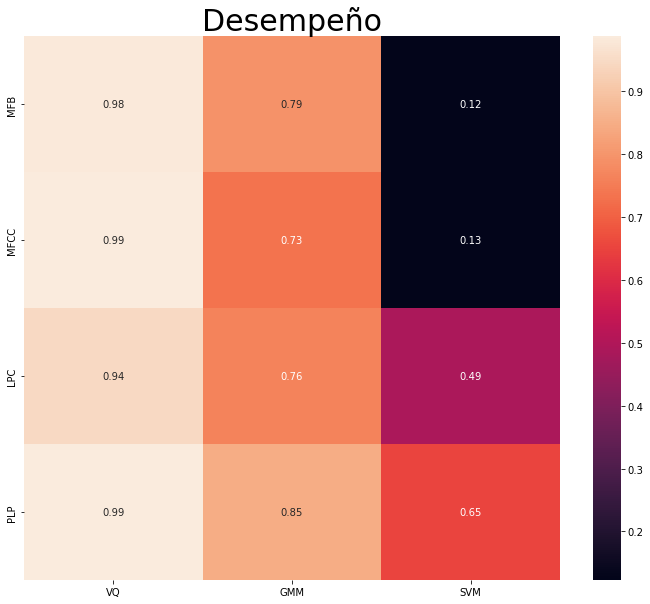

In [8]:
modelos, matriz = desempeño_general_matriz(mfb,mfcc,lpc,plp)
plt.figure(figsize=(12, 10))

plt.title("Desempeño",fontsize=30)
sns.heatmap(matriz,
            xticklabels=modelos, 
            yticklabels=['MFB','MFCC','LPC','PLP'],annot=True)

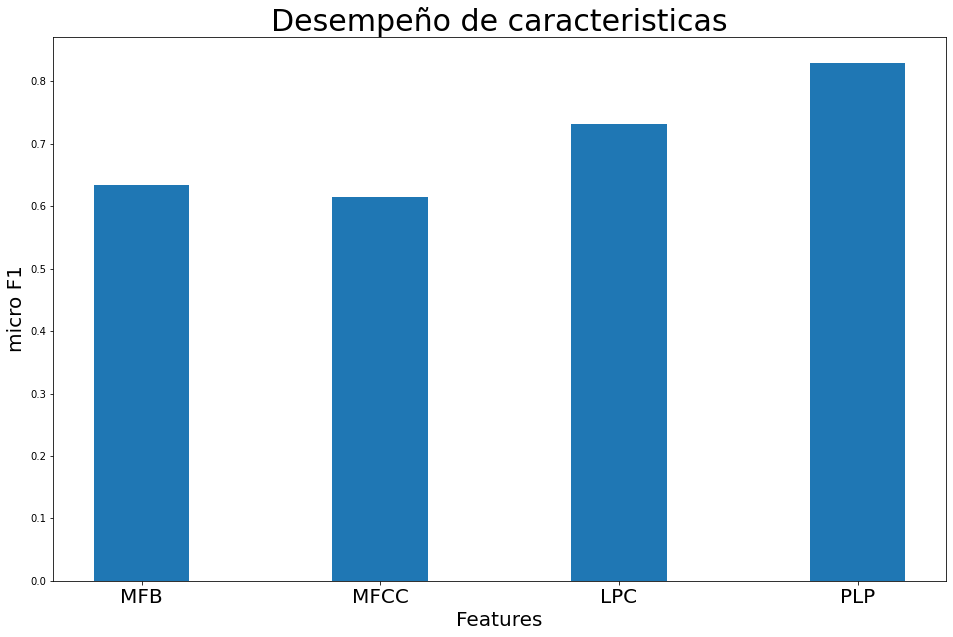

In [9]:
feat_performance = [mfb['microF1'].mean(),mfcc['microF1'].mean(),lpc['microF1'].mean(),plp['microF1'].mean()]
plt.figure(figsize=(16, 10))
plt.title(f"Desempeño de caracteristicas",fontsize=30)
plt.xlabel("Features",fontsize=20)
plt.ylabel("micro F1",fontsize=20)
feat_labels = ["MFB","MFCC","LPC","PLP"]
X_axis = np.arange(len(feat_labels))
plt.bar(feat_labels, feat_performance, width = 0.4)
plt.xticks(X_axis, feat_labels,fontsize=20)
plt.show()

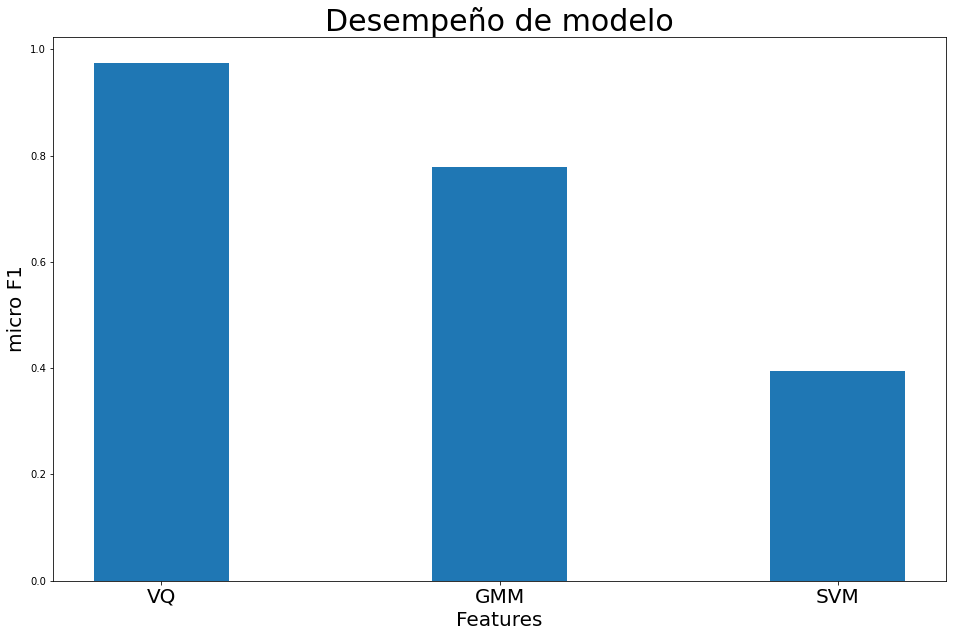

In [10]:
models_performance = desempeño_general_por_modelo(mfb,mfcc,lpc,plp,modelos)
plt.figure(figsize=(16, 10))
plt.title(f"Desempeño de modelo",fontsize=30)
plt.xlabel("Features",fontsize=20)
plt.ylabel("micro F1",fontsize=20)
X_axis = np.arange(len(modelos))
plt.bar(modelos, models_performance, width = 0.4)
plt.xticks(X_axis, modelos,fontsize=20)
plt.show()

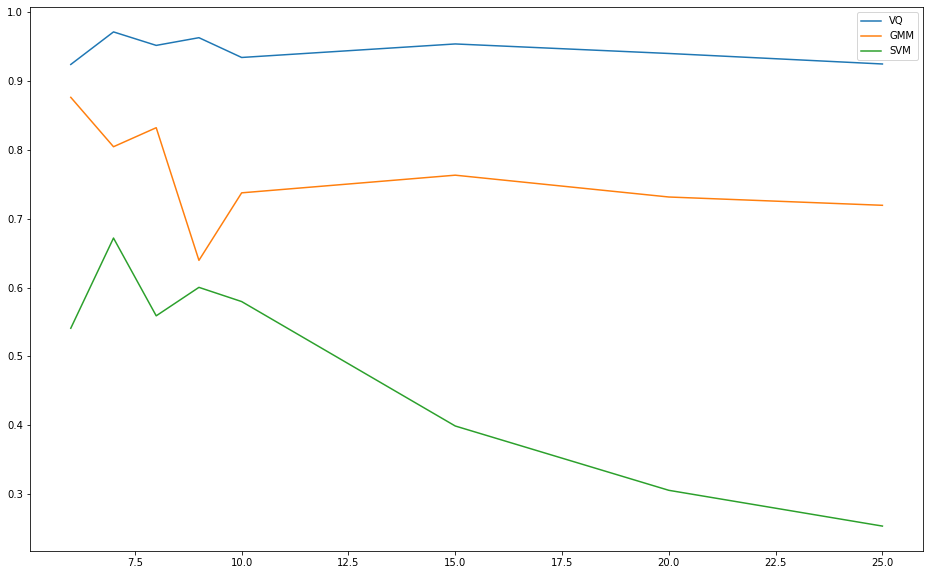

In [11]:
sp_list, model_list, p_list = desempeño_general_por_numero_de_locutores(lpc)
plt.figure(figsize=(16, 10))
for i in range(len(p_list)):
    plt.plot(sp_list, p_list[i]) 
plt.legend(model_list)